In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados que você acabou de gerar
df = pd.read_csv('ws_experiment_results.csv')

# Pega os valores de N e k do próprio DataFrame, 
# já que eles são constantes para este experimento.
N = df['N'].iloc[0]
k = df['k'].iloc[0]

In [21]:
# 1. Calcular a média das métricas para cada valor de 'p'
# (Agrupa os 10 seeds de cada 'p')
df_grouped = df.groupby('p')[['C_avg', 'L']].mean().reset_index()

In [22]:
# 2. Normalizar os resultados (para plotar no mesmo eixo)
# C(p) / C(0) e L(p) / L(0)
c0 = df_grouped.loc[df_grouped['p'] == 0, 'C_avg'].values[0]
l0 = df_grouped.loc[df_grouped['p'] == 0, 'L'].values[0]

df_grouped['C_normalized'] = df_grouped['C_avg'] / c0
df_grouped['L_normalized'] = df_grouped['L'] / l0

In [23]:
# 3. Preparar dados para o Seaborn (formato "longo")
df_plot = pd.melt(df_grouped, 
                  id_vars=['p'], 
                  value_vars=['C_normalized', 'L_normalized'],
                  var_name='Métrica', 
                  value_name='Valor Normalizado')

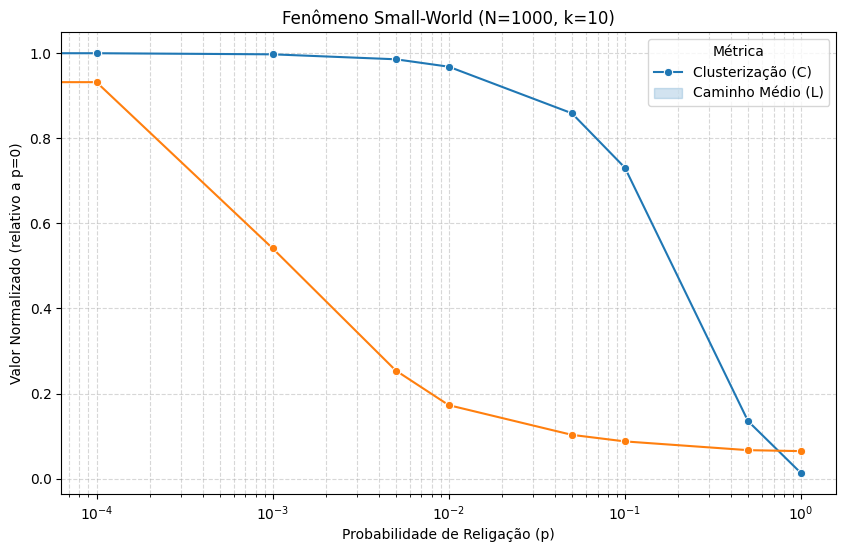

In [24]:
# 4. Plotar
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_plot, 
             x='p', 
             y='Valor Normalizado', 
             hue='Métrica', 
             marker='o')

plt.xscale('log') # Escala Logarítmica no eixo X (crucial!)
plt.title(f'Fenômeno Small-World (N={N}, k={k})')
plt.xlabel('Probabilidade de Religação (p)')
plt.ylabel('Valor Normalizado (relativo a p=0)')
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend(title='Métrica', labels=['Clusterização (C)', 'Caminho Médio (L)'])
plt.savefig('small_world_plot.png')
plt.show()